In [2]:
library(dplyr)
library(rio) #great for exporting, importing
library (stringr)
library(cowplot)
library(ggplot2)
library(tidyr)
library(ggpubr)

library(patchwork)
library(RColorBrewer)
library(viridis)

In [15]:
# Importing starch and sugar measurements done by Nick and Katie
Metabolites<- import(file = '~/Dropbox/Potato/RNA-seq_2/Starch&Sugars/Summary_Sugars.csv',
                                sep =',',header = TRUE, fill = TRUE )

In [16]:
Metabolites[1:3,]

,Metabolite,ZT,Tissue,Species,Condition,Average_Technical_Replicates
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,Starch,0,Leaf,CHC,SD,32.09355
2,Starch,0,Leaf,CHC,SD,NA
3,Starch,0,Leaf,CHC,SD,27.18898


In [17]:
Metabolites<- Metabolites %>% filter (!is.na(Average_Technical_Replicates)) 

In [18]:
Metabolites[1:3,]

,Metabolite,ZT,Tissue,Species,Condition,Average_Technical_Replicates
,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>
1,Starch,0,Leaf,CHC,SD,32.09355
2,Starch,0,Leaf,CHC,SD,27.18898
3,Starch,0,Leaf,CHC,SD,32.61392


In [20]:
Met_Av_SE <- Metabolites %>% group_by(Metabolite, ZT, Species, Condition) %>% 
                        summarize(Content = mean(Average_Technical_Replicates),
                                  SE = (sd(Average_Technical_Replicates)/sqrt(n())))

`summarise()` has grouped output by 'Metabolite', 'ZT', 'Species'. You can
override using the `.groups` argument.


In [21]:
head(Met_Av_SE)

Metabolite,ZT,Species,Condition,Content,SE
<chr>,<int>,<chr>,<chr>,<dbl>,<dbl>
Fructose,0,ATL,LD,1.0465817,0.26418066
Fructose,0,ATL,SD,1.1535889,0.30621696
Fructose,0,CHC,LD,0.1647934,0.16479340
Fructose,0,CHC,SD,0.1373617,0.02931617
Fructose,0,CND,LD,1.1433299,0.38982406
Fructose,0,CND,SD,2.0947395,1.02833605


In [47]:
Met_Av_SE <- Met_Av_SE %>% mutate(Metabolite = factor(Metabolite, levels = c('Starch', 'Sucrose', 'Glucose', 'Fructose')))

# Define plot functions

In [35]:
#Defining ribbon LDSD plot 
LDSD_ribbon_plot_multiple <- function(df,columns) {

plot_CHO <- df %>% 
    mutate(Condition = as.factor(Condition))%>%
  ggplot(.,aes(x=ZT,y=Content,col=Condition))+ # this means that all colors below are determined by Genome
   # geom_rect(aes(xmin=12,
             #     xmax = 24,
             #     ymin = -Inf,
              #    ymax = Inf), 
             #    fill = 'grey', alpha = 0.25, color = NA) +
geom_vline(xintercept = 16, linetype="dotted", 
                color = '#000000')+
        geom_vline(xintercept = 12, #linetype="dotted", 
                color = '#000000')+ #, linewidth=0.25
  geom_line(aes(x=ZT,y=Content,col =Condition, group = Condition))+ #group will separate different genes from the same Abbreviation
  geom_ribbon(aes(ymin=Content-SE,ymax=Content+SE, 
                  fill = Condition, group = Condition),alpha=0.2, linetype = 0)+ 
  
    facet_wrap(~Metabolite + Species, ncol = columns, scales = 'free_y')+ #
    
  theme(strip.background = element_blank(), #removes legend box/grey
        panel.grid =element_blank(),
       panel.background = element_rect(fill = FALSE, colour = "grey50"),
       panel.ontop = TRUE)+
       #legend.position="bottom")+
  scale_y_continuous()+
  scale_x_continuous(breaks=c(0,12,16,24))+
  labs(y="Content (umol/gFW)", x="ZT (h)")+
     scale_color_manual(values = c('SD' = '#33539E',     
                                   'LD'='#A5678E'))+ 
                                 
    scale_fill_manual(values = alpha(c('SD' = '#33539E',     
                                   'LD'='#A5678E'))) 
   
}

In [39]:
#Defining ribbon LDSD plot 
LDSD_ribbon_plot_multiple_same_y <- function(df,columns) {

plot_CHO <- df %>% 
    mutate(Condition = as.factor(Condition))%>%
  ggplot(.,aes(x=ZT,y=Content,col=Condition))+ # this means that all colors below are determined by Genome
   # geom_rect(aes(xmin=12,
             #     xmax = 24,
             #     ymin = -Inf,
              #    ymax = Inf), 
             #    fill = 'grey', alpha = 0.25, color = NA) +
geom_vline(xintercept = 16, linetype="dotted", 
                color = '#000000')+
        geom_vline(xintercept = 12, #linetype="dotted", 
                color = '#000000')+ #, linewidth=0.25
  geom_line(aes(x=ZT,y=Content,col =Condition, group = Condition))+ #group will separate different genes from the same Abbreviation
  geom_ribbon(aes(ymin=Content-SE,ymax=Content+SE, 
                  fill = Condition, group = Condition),alpha=0.2, linetype = 0)+ 
  
    facet_wrap(~Metabolite + Species, ncol = columns )+ #scales = 'free_y'
    
  theme(strip.background = element_blank(), #removes legend box/grey
        panel.grid =element_blank(),
       panel.background = element_rect(fill = FALSE, colour = "grey50"),
       panel.ontop = TRUE)+
       #legend.position="bottom")+
  scale_y_continuous()+
  scale_x_continuous(breaks=c(0,12,16,24))+
  labs(y="Content (umol/gFW)", x="ZT (h)")+
     scale_color_manual(values = c('SD' = '#33539E',     
                                   'LD'='#A5678E'))+ 
                                 
    scale_fill_manual(values = alpha(c('SD' = '#33539E',     
                                   'LD'='#A5678E'))) 
   
}

In [48]:
Plot<- Met_Av_SE %>% LDSD_ribbon_plot_multiple (., 3)

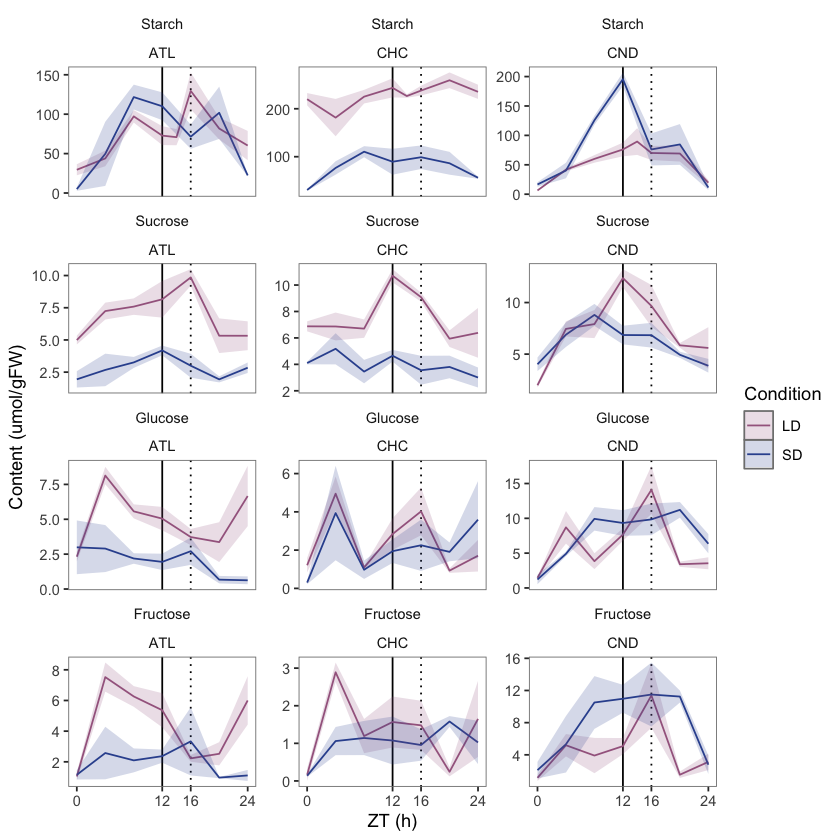

In [49]:
Plot

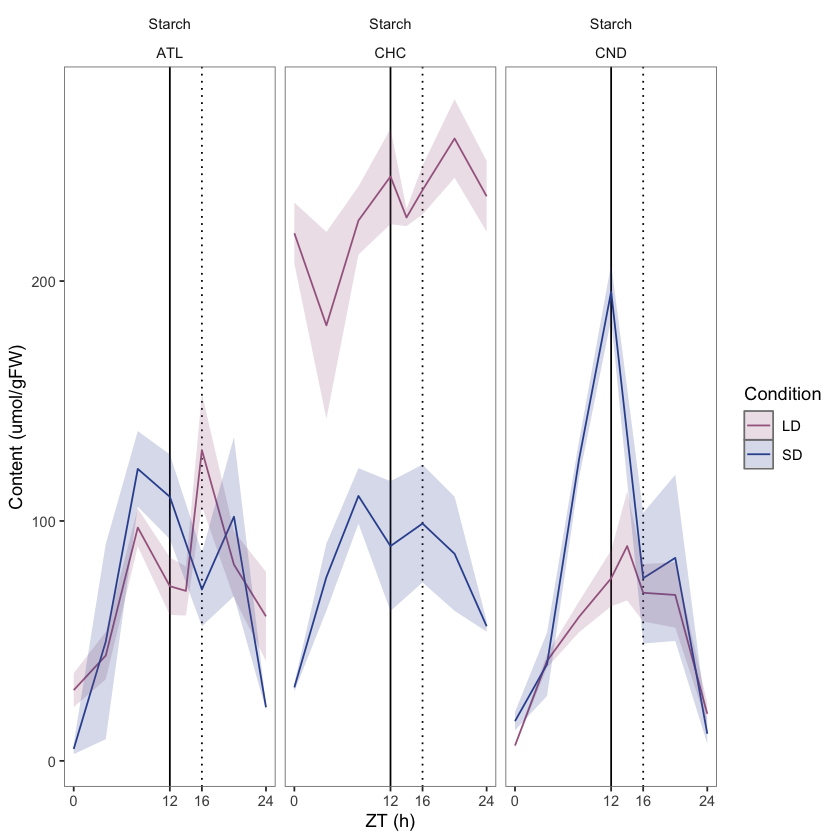

In [40]:
Starch<- Met_Av_SE  %>% filter (Metabolite == 'Starch') %>% LDSD_ribbon_plot_multiple_same_y (., 3)
Starch

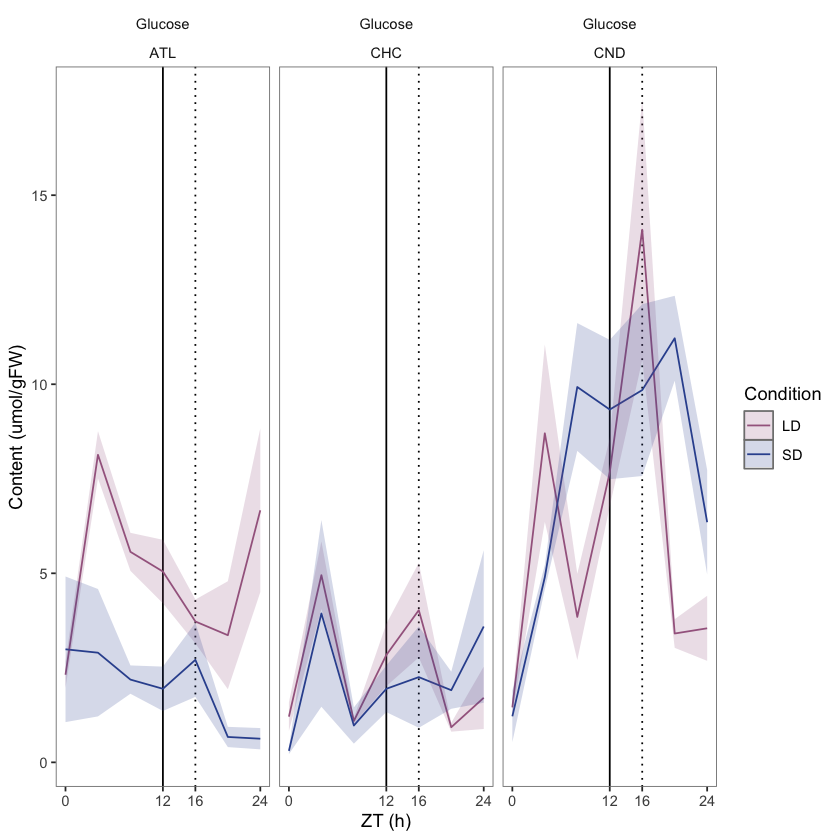

In [41]:
Glucose<- Met_Av_SE  %>% filter (Metabolite == 'Glucose') %>% LDSD_ribbon_plot_multiple_same_y (., 3)
Glucose

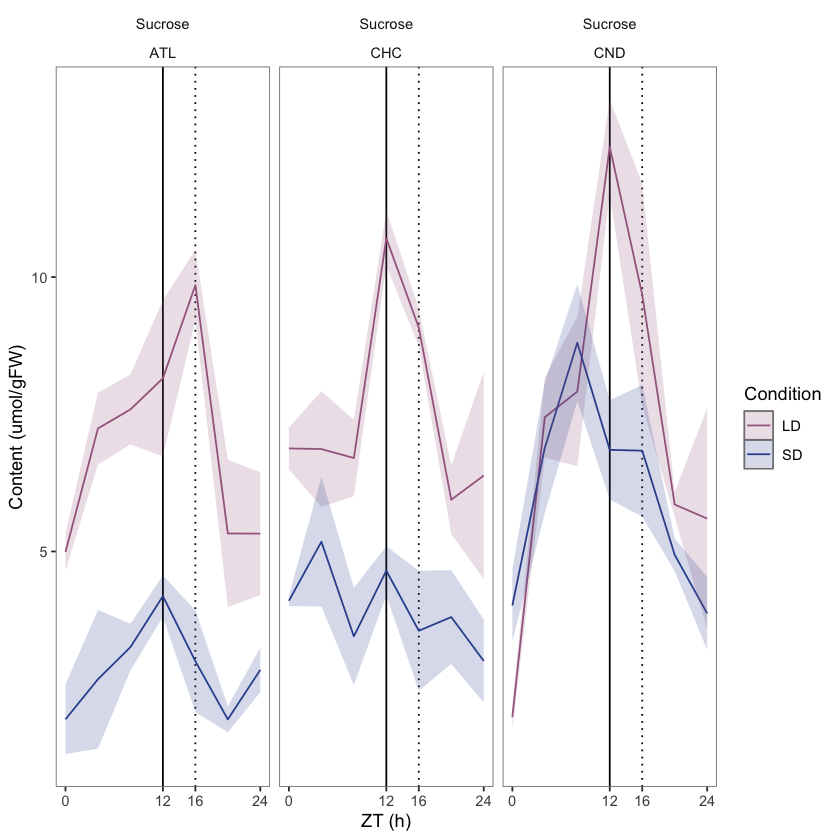

In [42]:
Sucrose<- Met_Av_SE  %>% filter (Metabolite == 'Sucrose') %>% LDSD_ribbon_plot_multiple_same_y (., 3)
Sucrose

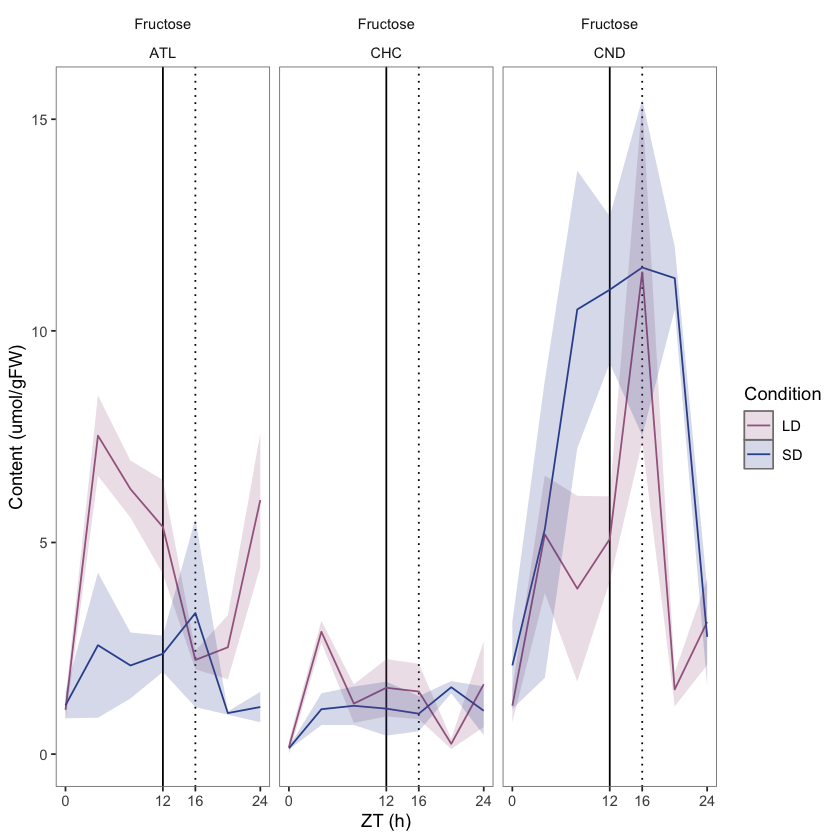

In [44]:
Fructose<- Met_Av_SE  %>% filter (Metabolite == 'Fructose') %>% LDSD_ribbon_plot_multiple_same_y (., 3)
Fructose